In [21]:
import numpy as np
import pandas as pd
nyc_df=pd.read_csv('C:\\Users\\tzcha\Documents\\IntelligentBuildingPerformanceDesign\\resources\\nyc_benchmarking_disclosure_data_reported_in_2017.csv')
name_list=list(range(1,28))
name_list.append(np.nan)

In [22]:
nyc_df=nyc_df.replace(['Office','Medical Office','College/University','Residence Hall/Dormitory','Hospital (General Medical & Surgical)',\
			'Mixed Use Property','Multifamily Housing','Worship Facility','Library','Social/Meeting Hall','Retail Store','Bank Branch','Financial Office',\
			'Enclosed Mall','K-12 School','Parking','Other - Recreation','Other - Specialty Hospital','Movie Theater','Manufacturing/Industrial Plant',\
			'Performing Arts','Senior Care Community','Supermarket/Grocery Store','Other - Entertainment/Public Assembly','Self-Storage Facility','Distribution Center',\
                'Other','Not Available'],name_list)
npc_df=nyc_df.replace(r'Whole',1,regex=True)

In [23]:
nyc_df=nyc_df[['SourceEUI','Year Built','Occupancy','PAC']].fillna(0)
nyc_df=nyc_df.convert_objects(convert_numeric=True)

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C69A49D198>]],
      dtype=object)

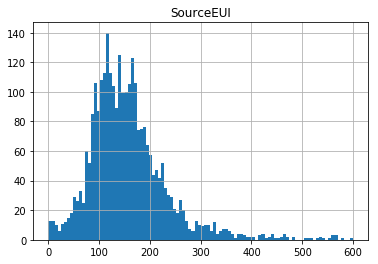

In [24]:
nyc_df2[nyc_df['SourceEUI']>0][nyc_df['SourceEUI']<600].hist(bins=100)

In [53]:
from IntelligentBuildingPerformanceDesign.AIBPD.data.preprocessing import PreprocessingNYC
from IntelligentBuildingPerformanceDesign.AIBPD.data.database import Database
database=Database()
CBECS_DF=database.select('nyc')
preprocessing=PreprocessingNYC(CBECS_DF)
CBECS_DF=preprocessing.replaceStrwithNum(CBECS_DF)
CBECS_DF=preprocessing.forClf(CBECS_DF)
CBECS_DF=CBECS_DF[CBECS_DF['PAC']==1.0]
HP=CBECS_DF[CBECS_DF['HEEB']==1.0]
MP=CBECS_DF[CBECS_DF['HEEB']==2.0]
LP=CBECS_DF[CBECS_DF['HEEB']==3.0]

Please check name of PAC which does not coincide attributes in your database
Please check name of Year Built which does not coincide attributes in your database
Please check name of Number of Buildings which does not coincide attributes in your database
Please check name of Occupancy which does not coincide attributes in your database
Please check name of Metered Areas (Energy) which does not coincide attributes in your database
Please check name of ENERGY STAR Score which does not coincide attributes in your database
Please check name of Site EUI which does not coincide attributes in your database
Please check name of Weather Normalized Site EUI (kBtu/ft2) which does not coincide attributes in your database
Please check name of Electricity Use - Grid Purchase (kBtu) which does not coincide attributes in your database
Please check name of Weather Normalized Site Electricity (kWh) which does not coincide attributes in your database
Please check name of Property GFA - Self-Reported (ft2)

C:\Users\tzcha\Documents\IntelligentBuildingPerformanceDesign\AIBPD\data\preprocessing.py:246: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return dataDF.convert_objects(convert_numeric=True)


In [54]:
m1=HP.shape[0]
m2=MP.shape[0]
m3=LP.shape[0]

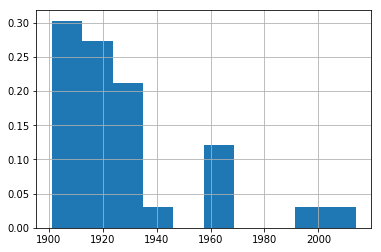

In [55]:
s_HP=HP[HP['Year Built']>1900]['Year Built'].shape[0]
HP[HP['Year Built']>1900]['Year Built'].hist(bins=10,density=False,weights= [1./s_HP] * s_HP)

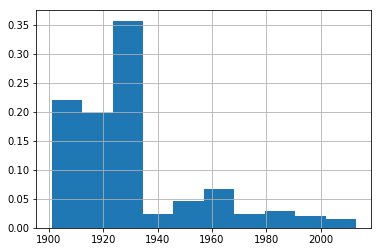

In [56]:
s_MP=MP[MP['Year Built']>1900]['Year Built'].shape[0]
MP[MP['Year Built']>1900]['Year Built'].hist(bins=10,density=False,weights= [1./s_MP] * s_MP)

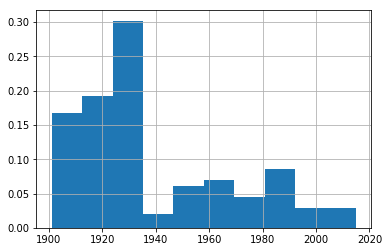

In [57]:
s_LP=LP[LP['Year Built']>1900]['Year Built'].shape[0]
LP[LP['Year Built']>1900]['Year Built'].hist(bins=10,density=False,weights= [1./s_LP] * s_LP)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C69E94D588>]],
      dtype=object)

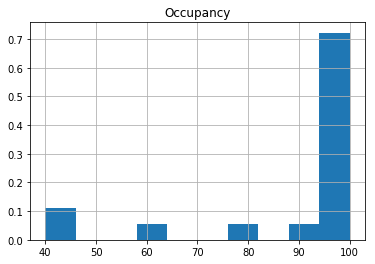

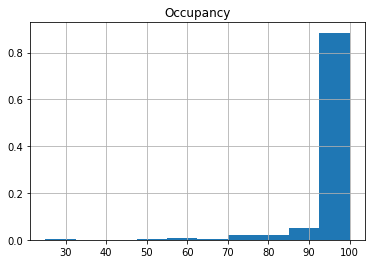

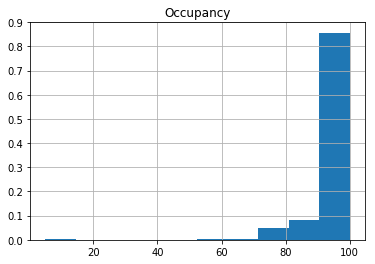

In [62]:
HP[['Occupancy']].hist(bins=10,density=False,weights= [1./m1] * m1)
MP[['Occupancy']].hist(bins=10,histtype='barstacked' ,density=False,weights= [1./m2] * m2)
LP[['Occupancy']].hist(bins=10,density=False,weights= [1./m3] * m3)